## Parameter Configuration

In [1]:
import sys
import numpy as np
import pandas as pd

from fairsearchcore.models import FairScoreDoc
import fairsearchcore as fsc
from codes.alg import FPRank, FSPR_model, best_FPRank
from codes.metrics import evaluate

######################################################################
# Column names
######################################################################

data = 'credit'
prt_attr = 'Married'
class_attr = 'h_c'
score_attr = 's'

######################################################################
# Configuration parameters
######################################################################

numBins = 10
bin_width = 0.1
score_norm = 1

filename = 'data/' + data + '_' + prt_attr
output_file = './results/' + data + '_' + prt_attr

## Loading Data

Min acceptability score = 0.0038, Max acceptability score = 0.9584


<Axes: xlabel='Class'>

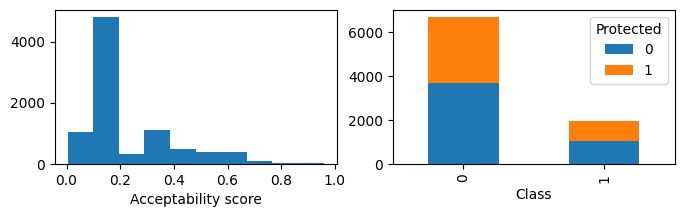

In [2]:
from codes.data_loader import load_data
import matplotlib.pyplot as plt

adj, data, W, s, y, prt = load_data(filename, class_attr, score_attr, prt_attr, score_norm = score_norm)
print('Min acceptability score = {:.4f}, Max acceptability score = {:.4f}'.format(np.min(s), np.max(s)))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,2))
ax1.hist(s)
ax1.set_xlabel('Acceptability score')

df = pd.DataFrame({'Class': y, 'Protected': prt}, dtype='int')
df.groupby(['Class', 'Protected']).size().unstack().plot(ax=ax2, kind='bar', stacked=True)

Total number of nodes = 8641
Number of isolated nodes = 0


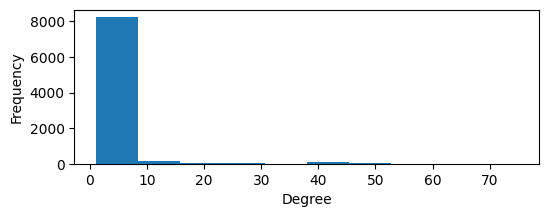

In [3]:
degrees = adj.sum(axis=1)
plt.figure(figsize=(6,2))
plt.hist(degrees)
plt.xlabel('Degree')
plt.ylabel('Frequency')

print('Total number of nodes =', degrees.shape[0])
print('Number of isolated nodes =', sum(degrees==0))

## Results for No Calibration

Results for No Calibration

  prec: 0.504244 |  Rank corr: 1.000000  | fp: 0.485592 | wsd: 0.000022 | wrd: 0.000038


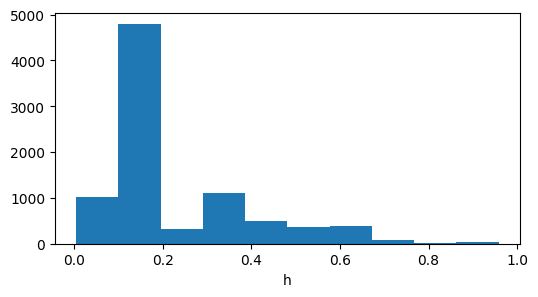

In [4]:
print('Results for No Calibration')
evaluate(s, y, s, prt, W, numBins = numBins, bin_width = bin_width)
out_df = pd.DataFrame({'h': s, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_Nocal.csv', index = False)

## Results for FPRank

In [5]:
results, params  = FPRank(W, s, y, prt, numBins = numBins, bin_width=bin_width)
out_df = pd.DataFrame(results)
out_df.to_csv(output_file + '_FPresults.csv', index=False)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  alpha=0.0100, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4837, wsd=0.000022, wrd=0.000038
  alpha=0.0100, beta=0.1624: prec=0.5041, corr=0.9998, fp=0.4830, wsd=0.000022, wrd=0.000037
  alpha=0.0100, beta=0.2637: prec=0.5041, corr=0.9995, fp=0.4818, wsd=0.000023, wrd=0.000037
  alpha=0.0100, beta=0.4281: prec=0.5039, corr=0.9987, fp=0.4795, wsd=0.000024, wrd=0.000036
  alpha=0.0100, beta=0.6952: prec=0.5036, corr=0.9969, fp=0.4764, wsd=0.000025, wrd=0.000034
  alpha=0.0100, beta=1.1288: prec=0.5033, corr=0.9924, fp=0.4715, wsd=0.000029, wrd=0.000031
  alpha=0.0100, beta=1.8330: prec=0.5026, corr=0.9830, fp=0.4651, wsd=0.000036, wrd=0.000026
  alpha=0.0100, beta=2.9764: prec=0.5018, corr=0.9659, fp=0.4545, wsd=0.000053, wrd=0.000020
  alpha=0.0100, beta=4.8329: prec=0.5001, corr=0.9399, fp=0.4381, wsd=0.000095, wrd=0.000016
  alpha=0.0100, beta=7.8476: prec=0.4981, corr=0.9096, fp=0.4200, wsd=0.000192, wrd=0.000018
  alpha=0.0100, beta=12.7427: prec=0.4930, corr=0.8788, fp=0.3893, wsd

 10%|████████▎                                                                          | 1/10 [00:26<04:00, 26.71s/it]

  alpha=0.0100, beta=1000.0000: prec=0.3860, corr=0.6165, fp=0.1485, wsd=0.004012, wrd=0.000478
  alpha=0.0278, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4837, wsd=0.000022, wrd=0.000038
  alpha=0.0278, beta=0.1624: prec=0.5041, corr=0.9998, fp=0.4830, wsd=0.000022, wrd=0.000037
  alpha=0.0278, beta=0.2637: prec=0.5040, corr=0.9995, fp=0.4818, wsd=0.000023, wrd=0.000037
  alpha=0.0278, beta=0.4281: prec=0.5039, corr=0.9987, fp=0.4795, wsd=0.000024, wrd=0.000036
  alpha=0.0278, beta=0.6952: prec=0.5036, corr=0.9969, fp=0.4764, wsd=0.000025, wrd=0.000034
  alpha=0.0278, beta=1.1288: prec=0.5033, corr=0.9924, fp=0.4715, wsd=0.000028, wrd=0.000031
  alpha=0.0278, beta=1.8330: prec=0.5026, corr=0.9830, fp=0.4651, wsd=0.000036, wrd=0.000026
  alpha=0.0278, beta=2.9764: prec=0.5018, corr=0.9659, fp=0.4545, wsd=0.000053, wrd=0.000020
  alpha=0.0278, beta=4.8329: prec=0.5001, corr=0.9399, fp=0.4381, wsd=0.000093, wrd=0.000016
  alpha=0.0278, beta=7.8476: prec=0.4980, corr=0.9096, fp=0.4200, w

 20%|████████████████▌                                                                  | 2/10 [00:52<03:28, 26.01s/it]

  alpha=0.0278, beta=1000.0000: prec=0.3859, corr=0.6165, fp=0.1485, wsd=0.004006, wrd=0.000474
  alpha=0.0774, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4837, wsd=0.000022, wrd=0.000038
  alpha=0.0774, beta=0.1624: prec=0.5041, corr=0.9998, fp=0.4830, wsd=0.000022, wrd=0.000037
  alpha=0.0774, beta=0.2637: prec=0.5040, corr=0.9995, fp=0.4818, wsd=0.000023, wrd=0.000037
  alpha=0.0774, beta=0.4281: prec=0.5039, corr=0.9987, fp=0.4795, wsd=0.000023, wrd=0.000036
  alpha=0.0774, beta=0.6952: prec=0.5036, corr=0.9969, fp=0.4764, wsd=0.000025, wrd=0.000034
  alpha=0.0774, beta=1.1288: prec=0.5033, corr=0.9924, fp=0.4715, wsd=0.000028, wrd=0.000031
  alpha=0.0774, beta=1.8330: prec=0.5026, corr=0.9830, fp=0.4651, wsd=0.000035, wrd=0.000026
  alpha=0.0774, beta=2.9764: prec=0.5018, corr=0.9659, fp=0.4545, wsd=0.000051, wrd=0.000020
  alpha=0.0774, beta=4.8329: prec=0.5001, corr=0.9399, fp=0.4381, wsd=0.000089, wrd=0.000016
  alpha=0.0774, beta=7.8476: prec=0.4981, corr=0.9096, fp=0.4199, w

 30%|████████████████████████▉                                                          | 3/10 [01:17<03:00, 25.81s/it]

  alpha=0.0774, beta=1000.0000: prec=0.3859, corr=0.6165, fp=0.1485, wsd=0.003991, wrd=0.000464
  alpha=0.2154, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4837, wsd=0.000022, wrd=0.000038
  alpha=0.2154, beta=0.1624: prec=0.5041, corr=0.9998, fp=0.4830, wsd=0.000022, wrd=0.000037
  alpha=0.2154, beta=0.2637: prec=0.5041, corr=0.9995, fp=0.4818, wsd=0.000022, wrd=0.000037
  alpha=0.2154, beta=0.4281: prec=0.5039, corr=0.9987, fp=0.4795, wsd=0.000023, wrd=0.000036
  alpha=0.2154, beta=0.6952: prec=0.5036, corr=0.9969, fp=0.4764, wsd=0.000025, wrd=0.000034
  alpha=0.2154, beta=1.1288: prec=0.5033, corr=0.9924, fp=0.4715, wsd=0.000028, wrd=0.000031
  alpha=0.2154, beta=1.8330: prec=0.5026, corr=0.9830, fp=0.4652, wsd=0.000034, wrd=0.000026
  alpha=0.2154, beta=2.9764: prec=0.5018, corr=0.9659, fp=0.4545, wsd=0.000048, wrd=0.000020
  alpha=0.2154, beta=4.8329: prec=0.5001, corr=0.9399, fp=0.4380, wsd=0.000080, wrd=0.000016
  alpha=0.2154, beta=7.8476: prec=0.4980, corr=0.9096, fp=0.4199, w

 40%|█████████████████████████████████▏                                                 | 4/10 [01:43<02:34, 25.76s/it]

  alpha=0.2154, beta=1000.0000: prec=0.3859, corr=0.6165, fp=0.1485, wsd=0.003950, wrd=0.000443
  alpha=0.5995, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4837, wsd=0.000021, wrd=0.000038
  alpha=0.5995, beta=0.1624: prec=0.5041, corr=0.9998, fp=0.4830, wsd=0.000021, wrd=0.000037
  alpha=0.5995, beta=0.2637: prec=0.5040, corr=0.9995, fp=0.4818, wsd=0.000021, wrd=0.000037
  alpha=0.5995, beta=0.4281: prec=0.5039, corr=0.9987, fp=0.4795, wsd=0.000022, wrd=0.000036
  alpha=0.5995, beta=0.6952: prec=0.5036, corr=0.9969, fp=0.4764, wsd=0.000024, wrd=0.000034
  alpha=0.5995, beta=1.1288: prec=0.5033, corr=0.9924, fp=0.4715, wsd=0.000026, wrd=0.000031
  alpha=0.5995, beta=1.8330: prec=0.5026, corr=0.9830, fp=0.4652, wsd=0.000032, wrd=0.000026
  alpha=0.5995, beta=2.9764: prec=0.5018, corr=0.9659, fp=0.4545, wsd=0.000042, wrd=0.000020
  alpha=0.5995, beta=4.8329: prec=0.5001, corr=0.9399, fp=0.4380, wsd=0.000067, wrd=0.000016
  alpha=0.5995, beta=7.8476: prec=0.4978, corr=0.9096, fp=0.4199, w

 50%|█████████████████████████████████████████▌                                         | 5/10 [02:08<02:08, 25.65s/it]

  alpha=0.5995, beta=1000.0000: prec=0.3860, corr=0.6165, fp=0.1485, wsd=0.003842, wrd=0.000409
  alpha=1.6681, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4837, wsd=0.000019, wrd=0.000038
  alpha=1.6681, beta=0.1624: prec=0.5041, corr=0.9998, fp=0.4830, wsd=0.000019, wrd=0.000037
  alpha=1.6681, beta=0.2637: prec=0.5041, corr=0.9995, fp=0.4818, wsd=0.000019, wrd=0.000037
  alpha=1.6681, beta=0.4281: prec=0.5039, corr=0.9987, fp=0.4795, wsd=0.000020, wrd=0.000036
  alpha=1.6681, beta=0.6952: prec=0.5037, corr=0.9969, fp=0.4764, wsd=0.000021, wrd=0.000034
  alpha=1.6681, beta=1.1288: prec=0.5033, corr=0.9924, fp=0.4716, wsd=0.000023, wrd=0.000031
  alpha=1.6681, beta=1.8330: prec=0.5026, corr=0.9830, fp=0.4652, wsd=0.000027, wrd=0.000026
  alpha=1.6681, beta=2.9764: prec=0.5018, corr=0.9659, fp=0.4543, wsd=0.000035, wrd=0.000020
  alpha=1.6681, beta=4.8329: prec=0.5001, corr=0.9399, fp=0.4380, wsd=0.000052, wrd=0.000015
  alpha=1.6681, beta=7.8476: prec=0.4973, corr=0.9096, fp=0.4197, w

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [02:34<01:42, 25.73s/it]

  alpha=1.6681, beta=1000.0000: prec=0.3861, corr=0.6165, fp=0.1485, wsd=0.003578, wrd=0.000348
  alpha=4.6416, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4837, wsd=0.000016, wrd=0.000037
  alpha=4.6416, beta=0.1624: prec=0.5041, corr=0.9998, fp=0.4830, wsd=0.000016, wrd=0.000037
  alpha=4.6416, beta=0.2637: prec=0.5040, corr=0.9995, fp=0.4818, wsd=0.000016, wrd=0.000037
  alpha=4.6416, beta=0.4281: prec=0.5039, corr=0.9987, fp=0.4795, wsd=0.000017, wrd=0.000036
  alpha=4.6416, beta=0.6952: prec=0.5037, corr=0.9969, fp=0.4766, wsd=0.000017, wrd=0.000034
  alpha=4.6416, beta=1.1288: prec=0.5033, corr=0.9924, fp=0.4716, wsd=0.000019, wrd=0.000031
  alpha=4.6416, beta=1.8330: prec=0.5026, corr=0.9830, fp=0.4652, wsd=0.000021, wrd=0.000026
  alpha=4.6416, beta=2.9764: prec=0.5017, corr=0.9659, fp=0.4543, wsd=0.000026, wrd=0.000020
  alpha=4.6416, beta=4.8329: prec=0.5000, corr=0.9399, fp=0.4380, wsd=0.000035, wrd=0.000015
  alpha=4.6416, beta=7.8476: prec=0.4973, corr=0.9096, fp=0.4197, w

 70%|██████████████████████████████████████████████████████████                         | 7/10 [03:00<01:17, 25.82s/it]

  alpha=4.6416, beta=1000.0000: prec=0.3874, corr=0.6165, fp=0.1485, wsd=0.003033, wrd=0.000346
  alpha=12.9155, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4839, wsd=0.000013, wrd=0.000037
  alpha=12.9155, beta=0.1624: prec=0.5041, corr=0.9998, fp=0.4830, wsd=0.000013, wrd=0.000037
  alpha=12.9155, beta=0.2637: prec=0.5041, corr=0.9995, fp=0.4817, wsd=0.000013, wrd=0.000036
  alpha=12.9155, beta=0.4281: prec=0.5040, corr=0.9987, fp=0.4795, wsd=0.000013, wrd=0.000036
  alpha=12.9155, beta=0.6952: prec=0.5037, corr=0.9969, fp=0.4766, wsd=0.000014, wrd=0.000034
  alpha=12.9155, beta=1.1288: prec=0.5032, corr=0.9924, fp=0.4717, wsd=0.000014, wrd=0.000031
  alpha=12.9155, beta=1.8330: prec=0.5025, corr=0.9830, fp=0.4652, wsd=0.000015, wrd=0.000026
  alpha=12.9155, beta=2.9764: prec=0.5017, corr=0.9659, fp=0.4543, wsd=0.000017, wrd=0.000019
  alpha=12.9155, beta=4.8329: prec=0.5000, corr=0.9399, fp=0.4380, wsd=0.000020, wrd=0.000015
  alpha=12.9155, beta=7.8476: prec=0.4973, corr=0.9096, fp

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [03:26<00:51, 25.85s/it]

  alpha=12.9155, beta=1000.0000: prec=0.3876, corr=0.6164, fp=0.1487, wsd=0.002165, wrd=0.000523
  alpha=35.9381, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4840, wsd=0.000010, wrd=0.000037
  alpha=35.9381, beta=0.1624: prec=0.5040, corr=0.9998, fp=0.4832, wsd=0.000010, wrd=0.000037
  alpha=35.9381, beta=0.2637: prec=0.5041, corr=0.9995, fp=0.4818, wsd=0.000010, wrd=0.000036
  alpha=35.9381, beta=0.4281: prec=0.5040, corr=0.9987, fp=0.4795, wsd=0.000011, wrd=0.000035
  alpha=35.9381, beta=0.6952: prec=0.5036, corr=0.9969, fp=0.4764, wsd=0.000011, wrd=0.000033
  alpha=35.9381, beta=1.1288: prec=0.5032, corr=0.9924, fp=0.4717, wsd=0.000011, wrd=0.000030
  alpha=35.9381, beta=1.8330: prec=0.5025, corr=0.9830, fp=0.4650, wsd=0.000011, wrd=0.000025
  alpha=35.9381, beta=2.9764: prec=0.5016, corr=0.9659, fp=0.4542, wsd=0.000011, wrd=0.000019
  alpha=35.9381, beta=4.8329: prec=0.4999, corr=0.9399, fp=0.4376, wsd=0.000012, wrd=0.000013
  alpha=35.9381, beta=7.8476: prec=0.4973, corr=0.9096, f

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [03:53<00:26, 26.13s/it]

  alpha=35.9381, beta=1000.0000: prec=0.3875, corr=0.6163, fp=0.1486, wsd=0.001162, wrd=0.000809
  alpha=100.0000, beta=0.1000: prec=0.5041, corr=0.9999, fp=0.4841, wsd=0.000007, wrd=0.000036
  alpha=100.0000, beta=0.1624: prec=0.5040, corr=0.9998, fp=0.4834, wsd=0.000007, wrd=0.000036
  alpha=100.0000, beta=0.2637: prec=0.5041, corr=0.9995, fp=0.4815, wsd=0.000007, wrd=0.000035
  alpha=100.0000, beta=0.4281: prec=0.5040, corr=0.9987, fp=0.4797, wsd=0.000007, wrd=0.000034
  alpha=100.0000, beta=0.6952: prec=0.5036, corr=0.9968, fp=0.4761, wsd=0.000007, wrd=0.000033
  alpha=100.0000, beta=1.1288: prec=0.5031, corr=0.9924, fp=0.4715, wsd=0.000007, wrd=0.000030
  alpha=100.0000, beta=1.8330: prec=0.5025, corr=0.9830, fp=0.4645, wsd=0.000008, wrd=0.000024
  alpha=100.0000, beta=2.9764: prec=0.5016, corr=0.9659, fp=0.4540, wsd=0.000008, wrd=0.000018
  alpha=100.0000, beta=4.8329: prec=0.4999, corr=0.9399, fp=0.4376, wsd=0.000008, wrd=0.000012
  alpha=100.0000, beta=7.8476: prec=0.4973, corr

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:22<00:00, 26.30s/it]

  alpha=100.0000, beta=1000.0000: prec=0.3873, corr=0.6161, fp=0.1489, wsd=0.000420, wrd=0.000921


Range of evaluation measures:
   Precision: 0.3859031410270253 0.5041393218277171
   Fairness perception: 0.14847818539520888 0.4840874898738572
   WSD: 0.004011604798776169 7.452133520059297e-06
   WRD: 0.001459109652418985 9.88510109303308e-06

Best parameters: alpha = 100.0000, beta = 0.1000 (util = 0.8897)

Result for FPRank:

  prec: 0.504056 |  Rank corr: 0.999923  | fp: 0.484087 | wsd: 0.000007 | wrd: 0.000036


{'precision': 0.5040563644348597,
 'corr': 0.9999228553546695,
 'fairperception': 0.4840874898738572,
 'wsd': 7.4522614361220465e-06,
 'wrd': 3.607136023892122e-05}

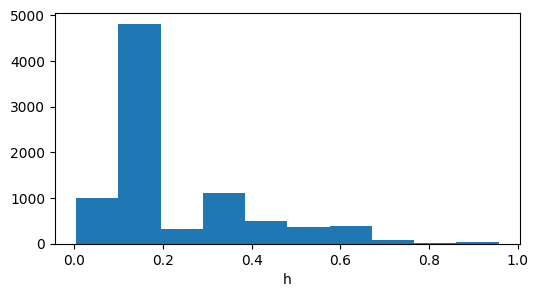

In [6]:
print('Range of evaluation measures:')
print('   Precision:', np.min(results['precision']), np.max(results['precision']))
print('   Fairness perception:', np.min(results['fairperception']), np.max(results['fairperception']))
print('   WSD:', np.max(results['wsd']), np.min(results['wsd']))
print('   WRD:', np.max(results['wrd']), np.min(results['wrd']))

h, bestparam, utils = best_FPRank(results, params)
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FPRank.csv', index = False)
print('\nResult for FPRank:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for InFoRM

Require InFoRM package that can be downloaded from https://github.com/jiank2/inform

In [7]:
from InFoRM import utils
from InFoRM.method.debias_model import DebiasModel
from scipy.sparse import csc_matrix

def debias_mining_model(adj, s, alpha=0., metric='cosine'):
    # init params
    c = 0.85

    sp_adj = csc_matrix(adj)
    adj = utils.symmetric_normalize(sp_adj)
    
    # build similarity matrix
    sim = utils.filter_similarity_matrix(utils.get_similarity_matrix(adj, metric=metric), sigma=0.75)
    sim = utils.symmetric_normalize(sim)

    # debias pagerank
    FairModel = DebiasModel()
    
    personalization = s.reshape(-1,1)
    personalization = personalization/personalization.sum()
    
    r = FairModel.pagerank(adj, sim, alpha, c=c, personalization=personalization)
    r = np.array([list(r.values())])
    r = csc_matrix(np.array(r).transpose())

    return r


  prec: 0.415260 |  Rank corr: 0.700635  | fp: 0.337924 | wsd: 0.000000 | wrd: 0.000175


{'precision': 0.41525971412586865,
 'corr': 0.7006354812546649,
 'fairperception': 0.33792385140608727,
 'wsd': 2.495464020216238e-10,
 'wrd': 0.00017473243751001068}

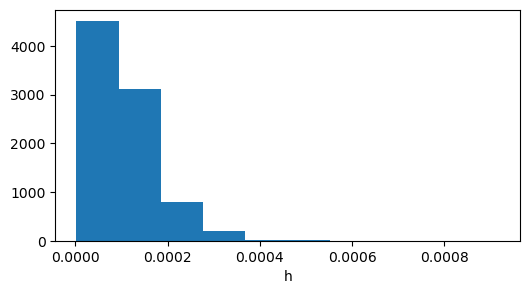

In [8]:
h = debias_mining_model(adj, s).toarray().flatten()
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_INFORM.csv', index = False)
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FSPR

     pcost       dcost       gap    pres   dres
 0: -1.9157e+02 -1.0391e+04  5e+04  2e+00  1e-15
 1: -6.3340e+01 -3.4214e+03  4e+03  7e-02  1e-15
 2: -5.9077e+00 -3.6945e+02  5e+02  7e-03  2e-15
 3: -6.8758e-01 -6.3419e+00  7e+00  7e-05  1e-15
 4: -7.5700e-01 -3.7493e+00  3e+00  3e-05  1e-15
 5: -9.1629e-01 -3.7880e+00  3e+00  3e-05  9e-16
 6: -1.2590e+00 -3.3645e+00  2e+00  1e-05  8e-16
 7: -1.7409e+00 -1.9980e+00  3e-01  8e-07  1e-15
 8: -1.8017e+00 -1.8474e+00  5e-02  1e-07  1e-15
 9: -1.8032e+00 -1.8316e+00  3e-02  1e-08  8e-16
10: -1.8158e+00 -1.8170e+00  1e-03  4e-10  1e-15
11: -1.8163e+00 -1.8164e+00  2e-05  5e-12  1e-15
12: -1.8164e+00 -1.8164e+00  4e-07  8e-14  1e-15
Optimal solution found.

  prec: 0.437370 |  Rank corr: 0.723320  | fp: 0.995255 | wsd: 0.000023 | wrd: 0.000458


{'precision': 0.43737043522633545,
 'corr': 0.7233204033881364,
 'fairperception': 0.9952551787987501,
 'wsd': 2.343156494442445e-05,
 'wrd': 0.0004581002855376009}

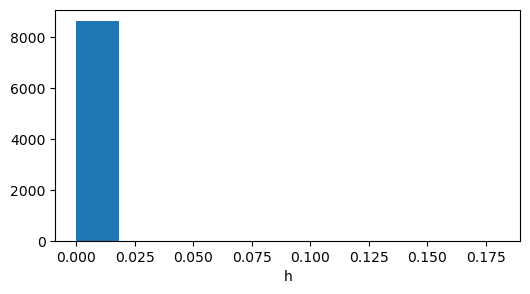

In [9]:
h = FSPR_model(adj, s, prt)
out_df = pd.DataFrame({'h': h.ravel(), prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FSPR.csv', index = False)
evaluate(h.ravel(), y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FairTopk

Require fairsearchcore library from https://github.com/fair-search/fairsearch-fair-python

D:\Anaconda\envs\fprank\lib\site-packages\fairsearchcore\fair.py:165: UserWarning: Library has not been tested with values outside this range
  warnings.warn("Library has not been tested with values outside this range")


Result for FairTopK:

  prec: 0.437225 |  Rank corr: 0.727408  | fp: 0.751302 | wsd: 0.003148 | wrd: 0.000712


{'precision': 0.43722526191298394,
 'corr': 0.7274078314057759,
 'fairperception': 0.7513019326466844,
 'wsd': 0.003147691163484377,
 'wrd': 0.0007117953911150841}

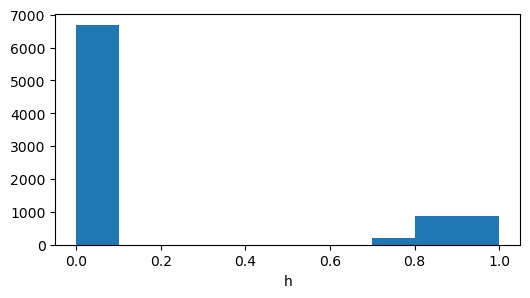

In [10]:
from codes.data_loader import load_data_fairtopk

rankings, k, p, data = load_data_fairtopk(filename, class_attr, score_attr, prt_attr, factor=10)

alpha = 0.1
fair = fsc.Fair(k, p, alpha)
re_ranked = fair.re_rank(rankings)
eps = 1/len(rankings)
h = np.zeros(len(rankings))
for i,item in enumerate(re_ranked):
    h[item.id] = 1 - i*eps
out_df = pd.DataFrame({'h': h, prt_attr : data[prt_attr]})
out_df.to_csv(output_file + '_FairTopk.csv', index = False)

print('Result for FairTopK:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)